In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt

# following to make output inside notebook.
# cell magic or line magic.
%matplotlib inline

In [2]:
bb = data.DataReader(name = "MSFT", data_source = "yahoo", start = "2007-07-01", end = "2008-12-31")
bb.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-07-02,29.799999,29.490000,29.670000,29.74,47316000.0,21.970081
2007-07-03,30.219999,29.780001,29.790001,30.02,35202600.0,22.176931
2007-07-05,30.219999,29.830000,30.049999,29.99,47838500.0,22.154766


In [3]:
type(bb)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Date'>

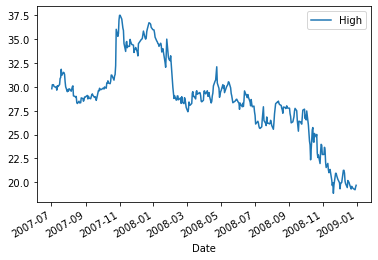

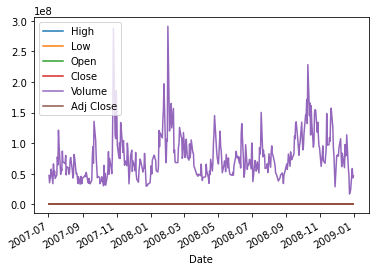

In [4]:
bb.plot(y = "High")
bb.plot()

In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:xlabel='Date'>

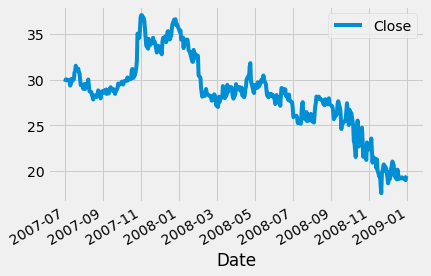

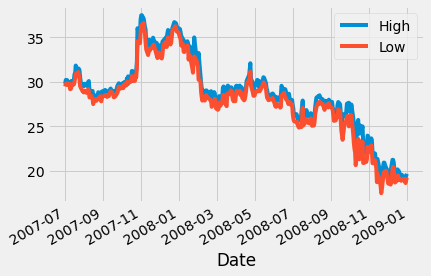

In [6]:
# changes setting for entire notebook
plt.style.use("fivethirtyeight")
bb.plot(y = "Close")
bb[["High", "Low"]].plot()

## Bar Charts

In [7]:
google = data.DataReader(name = "GOOG", data_source = "yahoo", start = "2004-01-01", end = "2016-12-31")
google.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735


In [8]:
def rank_performance(stock_price):
    if stock_price <= 200:
        return "Poor"
    elif stock_price > 200 and stock_price <= 500:
        return "Satisfactory"
    else:
        return "Stellar"

<AxesSubplot:>

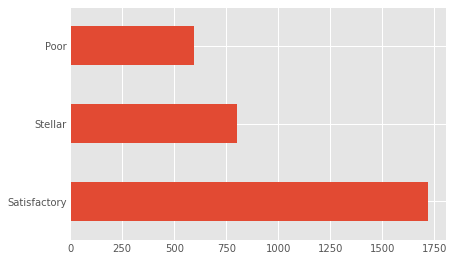

In [9]:
#  Use of value_counts()
plt.style.use("ggplot")
# google["Close"].apply(rank_performance).value_counts().plot()
# google["Close"].apply(rank_performance).value_counts().plot(kind = "bar")
google["Close"].apply(rank_performance).value_counts().plot(kind = "barh")


## Pie Charts

In [10]:
apple = data.DataReader(name = "AAPL", data_source = "yahoo", start = "2012-01-01", end = "2016-12-31")
apple.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044


In [11]:
apple["Close"].mean()

23.340429820771817

In [12]:
def rank_performance(stock_price):
    if stock_price >= 92.63809405940599:
        return "Above Average"
    else:
        return "Below Average"

<AxesSubplot:ylabel='Close'>

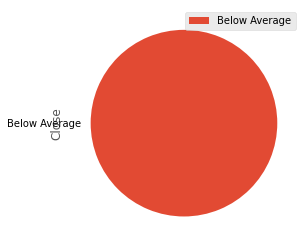

In [13]:
plt.style.use("ggplot")
apple["Close"].apply(rank_performance).value_counts().plot(kind = "pie", legend = True)

## Histograms

In [14]:
google = data.DataReader(name = "GOOG", data_source = "yahoo", start = "2004-01-01", end = "2016-12-31")
google.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735


In [15]:
def custom_round(stock_price):
    return int(stock_price / 100.0) * 100

In [16]:
custom_round(523)


500

In [17]:
google["High"].apply(custom_round).value_counts().sort_index()

0       159
100     414
200    1132
300     447
400     157
500     415
600     106
700     273
800      12
Name: High, dtype: int64

In [18]:
google["High"].apply(custom_round).nunique()

9

<AxesSubplot:ylabel='Frequency'>

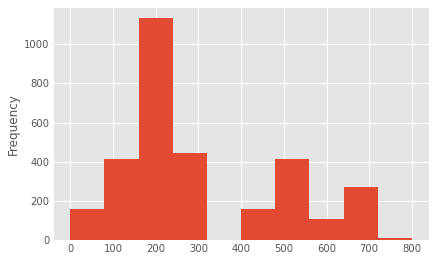

In [19]:
google["High"].apply(custom_round).plot(kind = "hist")

<AxesSubplot:ylabel='Frequency'>

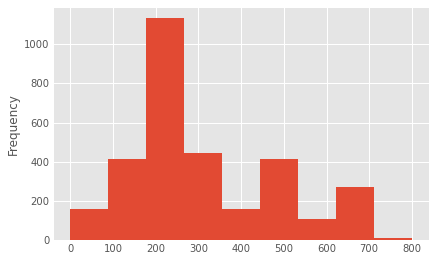

In [20]:
google["High"].apply(custom_round).plot(kind = "hist", bins = 9)

## Creating Multiplots on Same Canvas

In [21]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [22]:
plt.style.use("seaborn")

Text(0.5, 1.0, 'String Title Here')

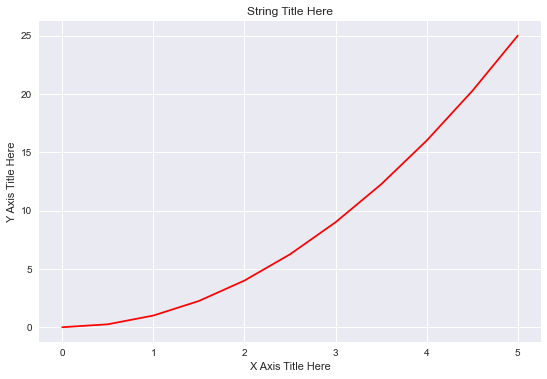

In [23]:
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')


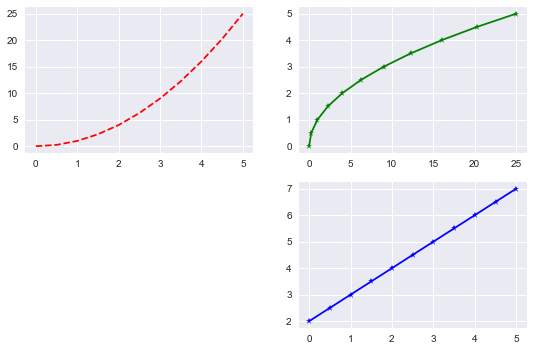

In [24]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(2,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(2,2,2)
plt.plot(y, x, 'g*-')
plt.subplot(2,2,4)
plt.plot(x, x+2, 'b*-')

## Object oriented method

[Text(0.5, 0, 'xAxis2'), Text(0.5, 1.0, 'insetTitle')]

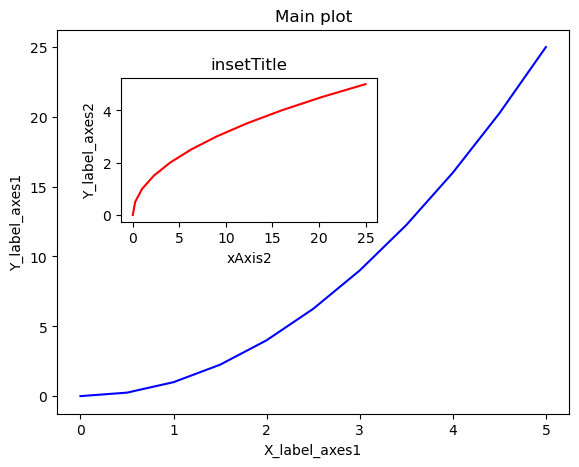

In [50]:
plt.style.use("default")
# Creates blank canvas
fig = plt.figure()

#left, bottom, width, height (range 0 to 1)
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes1')
axes1.set_ylabel('Y_label_axes1')
axes1.set_title('Main plot')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Inset plot');

axes2.set(xlabel = "xAxis2", title = "insetTitle")

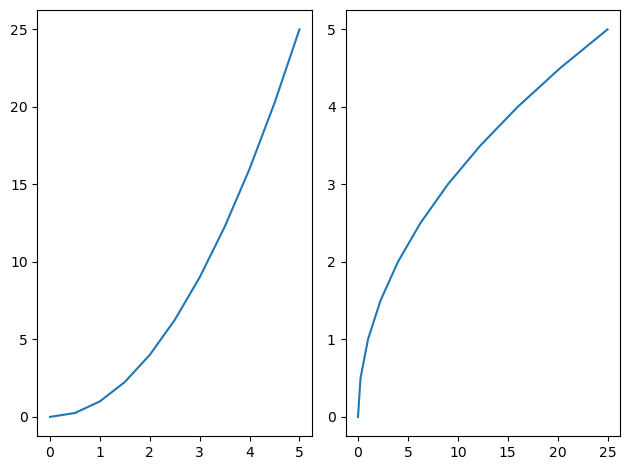

In [26]:
fig1, axes1 = plt.subplots(nrows=1, ncols=2)
axes1[0].plot(x,y)
axes1[1].plot(y,x)

plt.tight_layout()

In [27]:
fig.savefig("filename.png")

# Legends

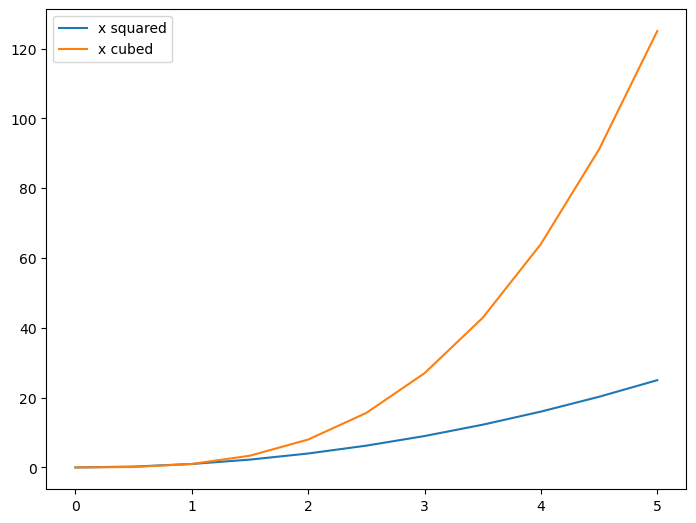

In [28]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

# multiple plots on same axes...
ax.plot(x, x**2, label="x squared")
ax.plot(x, x**3, label="x cubed")
ax.legend()

# Plot Range

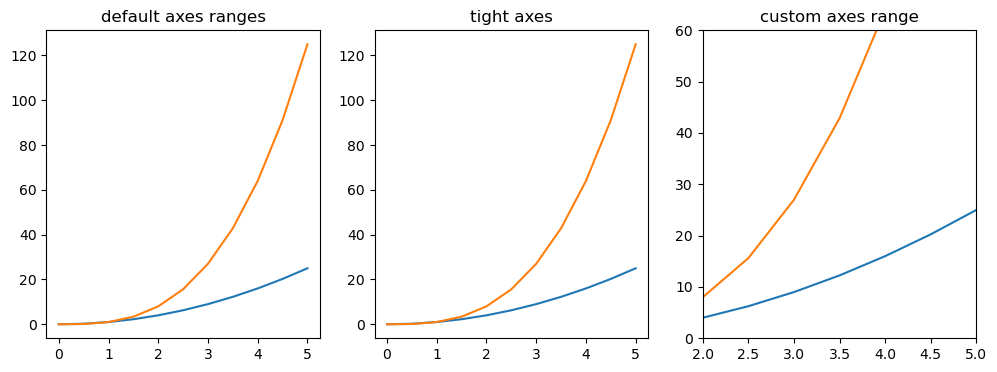

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

# Seaborn


# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

In [30]:
import seaborn as sns
%matplotlib inline

In [31]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

C:\Users\Abhishek\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

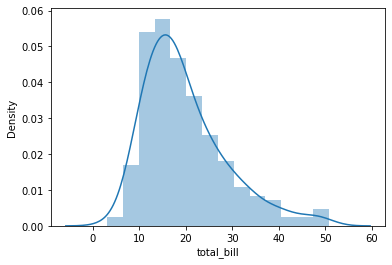

In [32]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

To remove the kde layer and just have the histogram use:

C:\Users\Abhishek\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

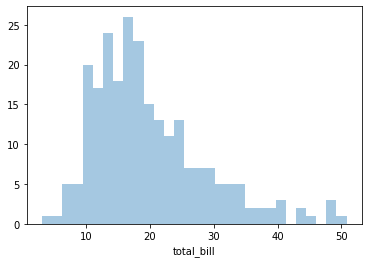

In [33]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

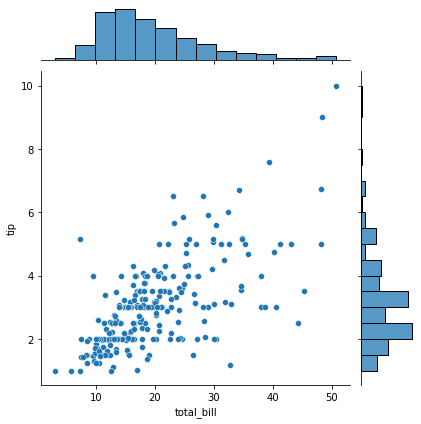

In [34]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

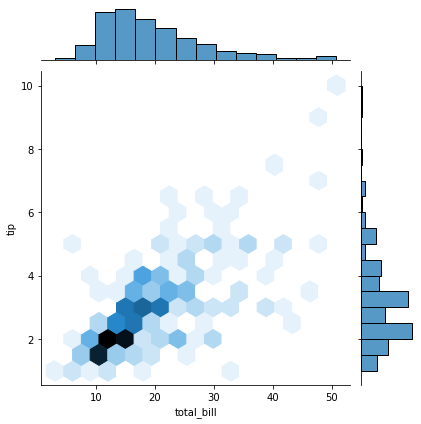

In [35]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

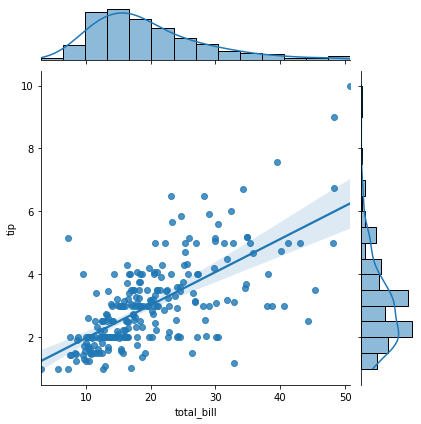

In [36]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

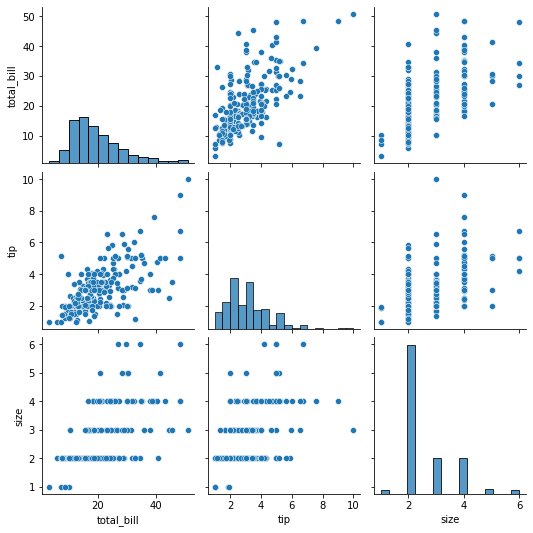

In [37]:
sns.pairplot(tips)

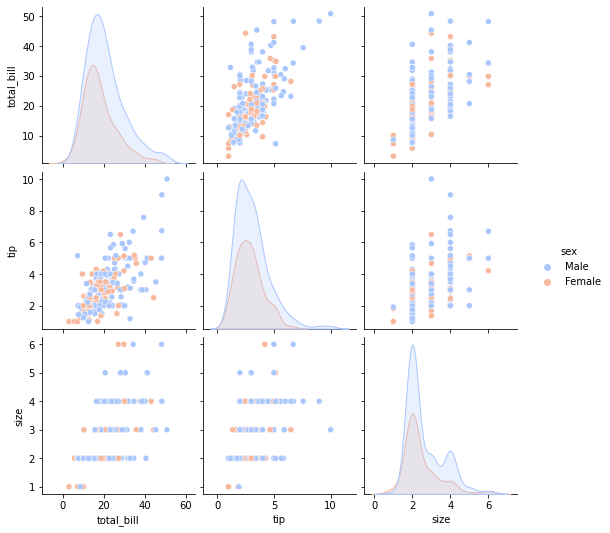

In [38]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<AxesSubplot:xlabel='total_bill'>

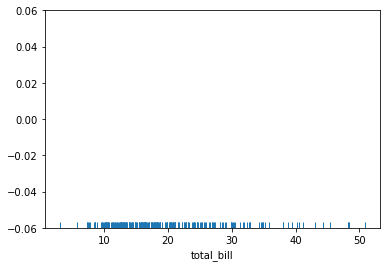

In [39]:
sns.rugplot(tips['total_bill'])

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

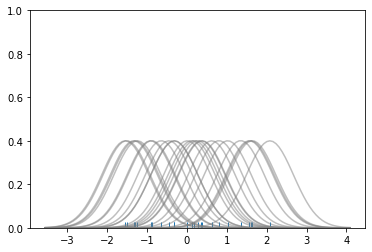

In [40]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

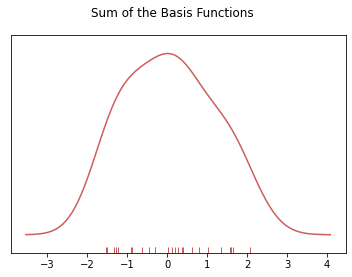

In [41]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:xlabel='tip', ylabel='Density'>

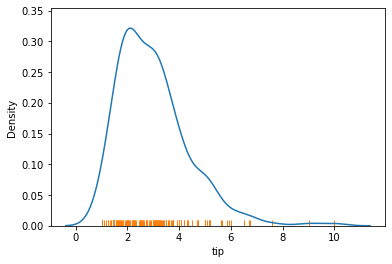

In [42]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

<AxesSubplot:xlabel='day', ylabel='total_bill'>

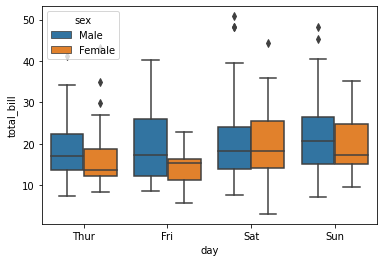

In [43]:
sns.boxplot(x="day", y="total_bill", data=tips,hue = "sex")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

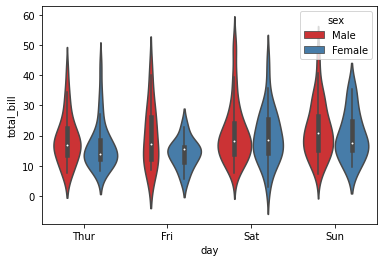

In [44]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [45]:
from plotly import __version__

In [46]:
print(__version__)

4.14.3


In [47]:
import cufflinks as cf

In [48]:
np.random.randn(100,4).shape

(100, 4)